### Mounting Drive

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the dataset


In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("/content/drive/MyDrive/Dataset/MLL/golf-dataset.csv")
dataset

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [3]:
dataset.shape

(14, 5)

### Encoding Feature

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset.iloc[:, 0] = le.fit_transform(dataset.iloc[:, 0])
dataset.iloc[:, 1] = le.fit_transform(dataset.iloc[:, 1])
dataset.iloc[:, 2] = le.fit_transform(dataset.iloc[:, 2])
dataset.iloc[:, 3] = le.fit_transform(dataset.iloc[:, 3])
dataset.iloc[:, 4] = le.fit_transform(dataset.iloc[:, 4])

In [5]:
dataset.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


### Splitting Input & Output

In [6]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, -1].values

In [7]:
print(X.shape)
print(y.shape)

(14, 4)
(14,)


### Scaling Feature

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
X[0:4, :]

array([[-0.08944272, -0.17149859, -1.        , -0.8660254 ],
       [-0.08944272, -0.17149859, -1.        ,  1.15470054],
       [-1.34164079, -0.17149859, -1.        , -0.8660254 ],
       [ 1.16275535,  1.02899151, -1.        , -0.8660254 ]])

### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1
)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11, 4)
(11,)
(3, 4)
(3,)


In [12]:
X_2 = np.delete(X, [1, 3], 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_2, y, test_size=0.50, random_state=0
)

In [13]:
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(7, 2)
(7,)
(7, 2)
(7,)


### Fitting Decision Tree Classification to the Training set


In [14]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
classifier2 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier2.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting the Test set results


In [16]:
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1 0]
 [1 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



### Visualising the Training set results


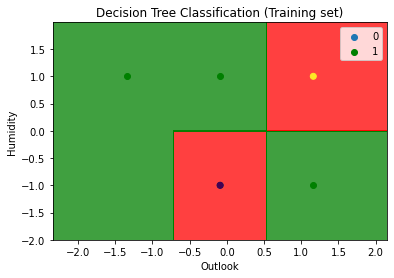

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

X_set, y_set = X_train2, y_train2
X1, X2, = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("Decision Tree Classification (Training set)")
plt.xlabel("Outlook")
plt.ylabel("Humidity")
plt.legend()
plt.show()

### Visualising the Test set results


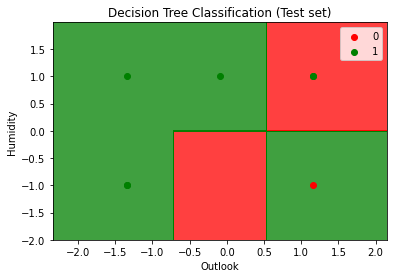

In [19]:
X_set, y_set = X_test2, y_test2
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("Decision Tree Classification (Test set)")
plt.xlabel("Outlook")
plt.ylabel("Humidity")
plt.legend()
plt.show()

### Visualising Tree

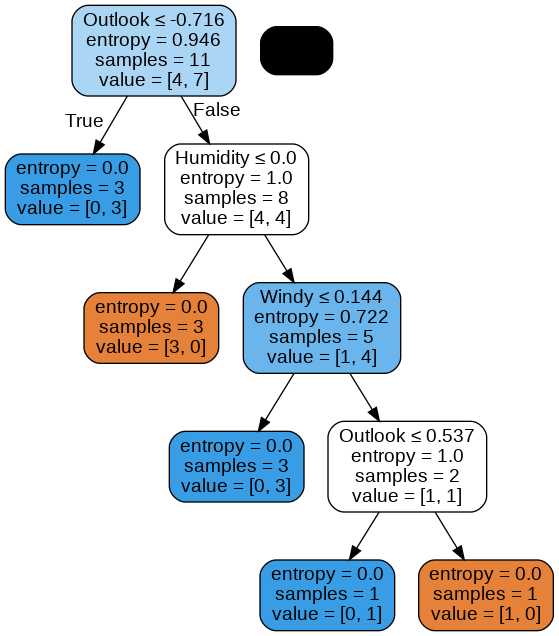

In [20]:
# import six
# import sys
# sys.modules['sklearn.externals.six'] = six
# from sklearn.externals.six import StringIO
# dot_data = StringIO()

from sklearn import tree
from IPython.display import Image
import pydotplus

feature_names = ["Outlook", "Temp", "Humidity", "Windy"]
# target_names = dataset['Play Golf'].unique().tolist()
data = tree.export_graphviz(
    classifier,
    feature_names=feature_names,
    # class_names= target_names,
    out_file=None,
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())
# graph = graphviz.Source(dot_data, format="png")
# graph